# Quiz 3

BEFORE YOU START THIS QUIZ:

1. Click on "Copy to Drive" to make a copy of the quiz,

2. Click on "Share",
    
3. Click on "Change" and select "Anyone with this link can edit"
    
4. Click "Copy link" and

5. Paste the link into [this Canvas assignment](https://canvas.olin.edu/courses/313/assignments/4985). 

This quiz is open notes, open internet. The only thing you can't do is ask for help.

Copyright 2021 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/DSIRP/raw/main/american-english')

## Question 1

The following is the implementation of a binary search tree (BST) from `search.ipynb`.

In [2]:
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        
    def __repr__(self):
        return f'Node({self.data}, {repr(self.left)}, {repr(self.right)})'

In [3]:
class BSTree:
    def __init__(self, root=None):
        self.root = root
        
    def __repr__(self):
        return f'BSTree({repr(self.root)})'

In [4]:
def insert(tree, data):
    tree.root = insert_rec(tree.root, data)
    
def insert_rec(node, data):
    if node is None:
        return Node(data)
    
    if data < node.data:
        node.left = insert_rec(node.left, data)
    else:
        node.right = insert_rec(node.right, data)
        
    return node

The following cell reads words from a file and adds them to a BST.
But if you run it, you'll get a `RecursionError`.

In [6]:
filename = 'american-english'
tree = BSTree()
for line in open(filename):
    for word in line.split():
        insert(tree, word.strip())

RecursionError: maximum recursion depth exceeded

However, if we put the words into a list, shuffle the list, and then put the shuffled words into the BST, it works.

In [7]:
word_list = []
for line in open(filename):
    for word in line.split():
        word_list.append(word.strip())

In [8]:
from random import shuffle

shuffle(word_list)

In [9]:
tree = BSTree()
for word in word_list:
    insert(tree, word.strip())

Write a few clear, complete sentences to answer the following two questions:

1) Why did we get a `RecursionError`, and why does shuffling the words fix the problem?

Since the unshuffled list is already in alphabetical order, the function is placing them in a tree that will never have more than one branch coming off of each word. RecursionError comes after 1000 runs, and there are far more than 1000 words in the dictionary. When it is shuffled, the function can sort the list in a tree without reaching 1000 recursions.

2) What is the order of growth for the whole process; that is, reading the words into a list, shuffling the list, and then putting the shuffled words into a binary search tree. You can assume that `shuffle` is linear.

$O(n)$ would be the order of growth because it is a binary search tree in addition to reading each word into a list and then shuffling the list, which is linear.

## Question 2

As we discussed in class, there are three versions of the search problem:

1) Checking whether an element is in a collection; for example, this is what the `in` operator does.

2) Finding the index of an element in an ordered collection; for example, this is what the string method `find` does.

3) In a collection of key-value pairs, finding the value that corresponds to a given key; this is what the dictionary method `get` does.

In `search.ipynb`, we used a BST to solve the first problem. In this exercise, you will modify it to solve the third problem.

Here's the code again (although notice that the names of the objects are `MapNode` and `BSTMap`).

In [5]:
class MapNode:
    def __init__(self, key, value, left=None, right=None):
        self.key = key
        self.value = value
        self.left = left
        self.right = right
        
    def __repr__(self):
        return f'MapNode({self.key}, {repr(self.left)}, {repr(self.right)})'

In [6]:
class BSTMap:
    def __init__(self, root=None):
        self.root = root
        
    def __repr__(self):
        return f'BSTMap({repr(self.root)})'

In [7]:
def insert_map(tree, key, value):
    tree.root = insert_map_rec(tree.root, key, value)
    
def insert_map_rec(node, key, value):
    if node is None:
        return MapNode(key, value)
    
    if key < node.key:
        node.left = insert_map_rec(node.left, key, value)
    else:
        node.right = insert_map_rec(node.right, key, value)
        
    return node

In [8]:
def get(tree, key):
    return get_rec(tree.root, key)

def get_rec(node, key):
    if key == node.key:
        return node.value

    if node.left and key < node.key:
        return get_rec(node.left, key)
    elif node.right and key > node.key:
        return get_rec(node.right, key)
    else:
        raise KeyError("Key not found")

In [1]:
try:
    import EoN
except ImportError:
    !pip3 install EoN

In [15]:
import networkx as nx

def add_edges(node, G):
    """Make a NetworkX graph that represents the heap."""
    if node is None:
        return
    
    G.add_node(node, label=node.key)
    for child in (node.left, node.right):
        if child:
            G.add_edge(node, child)
            add_edges(child, G)

NameError: name 'tree' is not defined

In [19]:
labels = {node: node.key for node in G.nodes()}

In [20]:
from EoN import hierarchy_pos

def draw_tree(tree):
    G = nx.DiGraph()
    add_edges(tree.root, G)
    pos = hierarchy_pos(G)
    labels = {node: node.key for node in G.nodes()}
    nx.draw(G, pos, labels=labels, alpha=0.4)

Modify this code so that it stores keys and values, rather than just elements of a collection.
Then write a function called `get` that takes a `BSTMap` and a key:

* If the key is in the map, it should return the corresponding value;

* Otherwise it should raise a `KeyError` with an appropriate message.

You can use the following code to test your implementation.

In [9]:
tree_map = BSTMap()

keys = 'uniqueltrs'
values = range(len(keys))
for key, value in zip(keys, values):
    print(key, value)
    insert_map(tree_map, key, value)

tree_map

u 0
n 1
i 2
q 3
u 4
e 5
l 6
t 7
r 8
s 9


BSTMap(MapNode(u, MapNode(n, MapNode(i, MapNode(e, None, None), MapNode(l, None, None)), MapNode(q, None, MapNode(t, MapNode(r, None, MapNode(s, None, None)), None))), MapNode(u, None, None)))

In [78]:
for key in keys:
    print(key, get(tree_map, key))

u 0
n 1
i 2
q 3
u 0
e 5
l 6
t 7
r 8
s 9


The following should raise a `KeyError`.

In [81]:
get(tree_map, 'b')

KeyError: 'Key not found'

In [17]:
G = nx.DiGraph()
add_edges(tree_map.root, G)
G.nodes()

NodeView((MapNode(u, MapNode(n, MapNode(i, MapNode(e, None, None), MapNode(l, None, None)), MapNode(q, None, MapNode(t, MapNode(r, None, MapNode(s, None, None)), None))), MapNode(u, None, None)), MapNode(n, MapNode(i, MapNode(e, None, None), MapNode(l, None, None)), MapNode(q, None, MapNode(t, MapNode(r, None, MapNode(s, None, None)), None))), MapNode(i, MapNode(e, None, None), MapNode(l, None, None)), MapNode(e, None, None), MapNode(l, None, None), MapNode(q, None, MapNode(t, MapNode(r, None, MapNode(s, None, None)), None)), MapNode(t, MapNode(r, None, MapNode(s, None, None)), None), MapNode(r, None, MapNode(s, None, None)), MapNode(s, None, None), MapNode(u, None, None)))

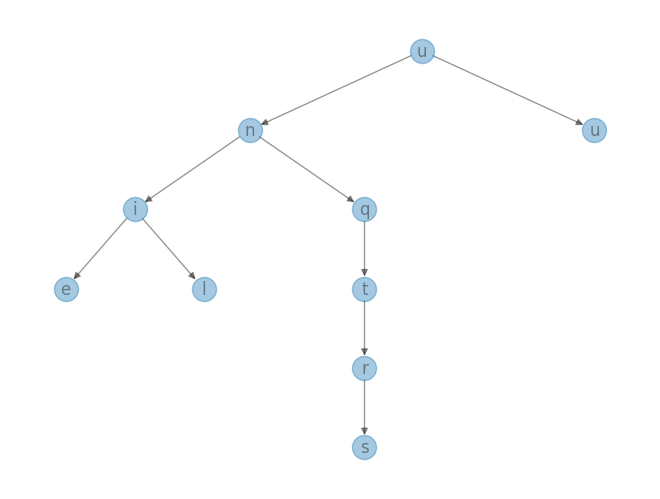

In [21]:
draw_tree(tree_map)

## Alternative solution

Modify this code so that it stores keys and values, rather than just elements of a collection.
Then write a function called `get` that takes a `BSTMap` and a key:

* If the key is in the map, it should return the corresponding value;

* Otherwise it should raise a `KeyError` with an appropriate message.

You can use the following code to test your implementation.

In [ ]:
tree_map = BSTMap()

keys = 'uniqueltrs'
values = range(len(keys))
for key, value in zip(keys, values):
    print(key, value)
    insert_map(tree_map, key, value)

tree_map

In [ ]:
for key in keys:
    print(key, get(tree_map, key))